# E.D.B Project: 지가상승률을 고려한 부동산 추천 모델 개발
### - Contents -
1. Project Goal
2. Collecting the data
3. Exploratory data analysis
4. Feature engineering
5. Modelling
6. Testing



# 1. Project Goal
- 과거 연도별 지역 통계를 통해 미래의 지가변동률을 예측.
- 관련 부동산 매물의 예측 지가변동률을 제공함으로서 높은 질의 서비스를 제공.

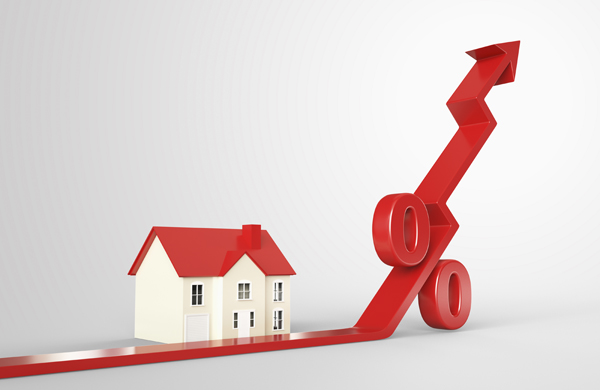

In [1]:
from IPython.display import Image
Image("http://img.etoday.co.kr/pto_db/2017/08/20170802101109_1106708_600_390.jpg",width=600)

# 2. Collecting the data
* 지역별 통계 데이터(http://www.r-one.co.kr/rone/)
* 지역 매물 통계 데이터(http://www.onnara.go.kr/#none)

In [2]:
# load train, test dataset using Pandas
import pandas as pd
train = pd.read_csv("C:\edb_train.csv",header=0)
test = pd.read_csv("C:\edb_test.csv",header=0)

# 3. Exploratory data analysis

### 3.1 Data Dictionary
* train: '연도', '시', '구', '동', '기초수급자', '건설업 사업체수', '도매 및 소매 사업체수' ... '체육공원(수)', ***'지가변동률'***
* test: '연도', '시', '구', '동', '기초수급자', '건설업 사업체수', '도매 및 소매 사업체수' ... '체육공원(수)'

In [3]:
train.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,공원(수),소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수),지가변동률
0,2015.0,서울특별시,종로구,사직동,90.0,42.0,585.0,836.0,111.0,326.0,...,67.0,19.0,13.0,30.0,2.0,3.0,0.0,0.0,0.0,1.194
1,2015.0,서울특별시,종로구,삼청동,46.0,8.0,233.0,219.0,5.0,31.0,...,67.0,19.0,13.0,30.0,2.0,3.0,0.0,0.0,0.0,2.256
2,2015.0,서울특별시,종로구,부암동,103.0,15.0,94.0,126.0,3.0,21.0,...,67.0,19.0,13.0,30.0,2.0,3.0,0.0,0.0,0.0,1.190
3,2015.0,서울특별시,종로구,평창동,128.0,25.0,139.0,151.0,6.0,12.0,...,67.0,19.0,13.0,30.0,2.0,3.0,0.0,0.0,0.0,1.958
4,2015.0,서울특별시,종로구,무악동,120.0,6.0,54.0,57.0,3.0,4.0,...,67.0,19.0,13.0,30.0,2.0,3.0,0.0,0.0,0.0,0.919


In [4]:
test.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,교양시설,공원(수),소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수)
0,2018.0,서울특별시,종로구,사직동,109.0,37.0,579.0,856.0,132.0,302.0,...,14.0,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0
1,2018.0,서울특별시,종로구,삼청동,58.0,6.0,288.0,240.0,6.0,47.0,...,14.0,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0
2,2018.0,서울특별시,종로구,부암동,133.0,26.0,104.0,130.0,5.0,26.0,...,14.0,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0
3,2018.0,서울특별시,종로구,평창동,138.0,21.0,139.0,154.0,8.0,32.0,...,14.0,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0
4,2018.0,서울특별시,종로구,무악동,126.0,8.0,46.0,28.0,3.0,3.0,...,14.0,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0


### 3.2 데이터 시각화

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# 노트북에 바로 그래프를 나타내기 위해
%matplotlib inline

# 그래프에서 격자로 숫자범위가 눈에 잘 들어오도록 하기 위해
plt.style.use('ggplot')

#그래프에서 마이너스 폰트가 깨지는 것을 대처
mpl.rcParams['axes.unicode_minus']=False

In [6]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

#### 3.2.1Categorical Data: (연도,시,구,KTX역세권해당여부,국립공원 보유여부)

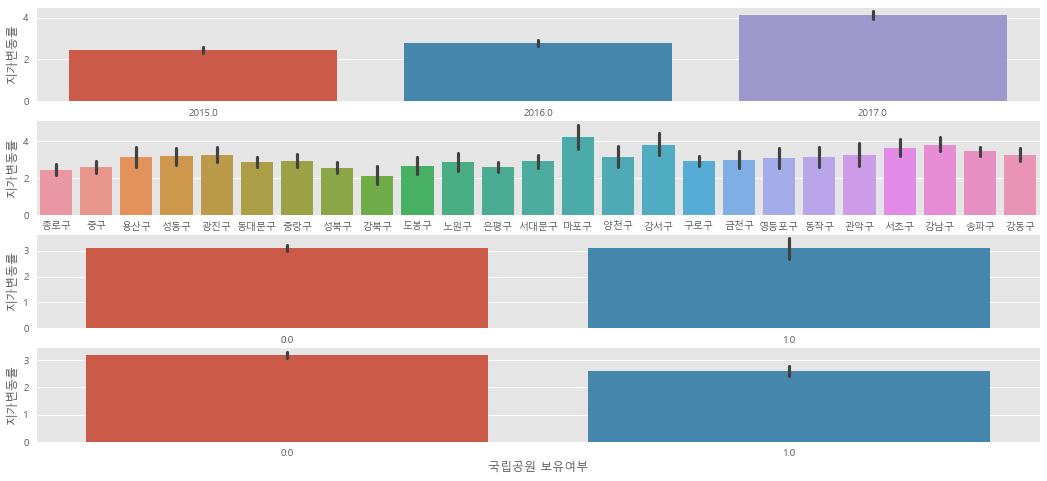

In [7]:
fig,((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=4)
fig.set_size_inches(18,8)

sns.barplot(data=train,x="연도",y="지가변동률",ax=ax1)
sns.barplot(data=train,x="구",y="지가변동률",ax=ax2)
sns.barplot(data=train,x="KTX역세권해당여부",y="지가변동률",ax=ax3)
sns.barplot(data=train,x="국립공원 보유여부",y="지가변동률",ax=ax4)

#### 3.2.2 Numerical Data: ( '기초수급자', '건설업 사업체수', '도매 및 소매 사업체수', '숙박및 음식점업'... '묘지공원(수)','체육공원(수)')

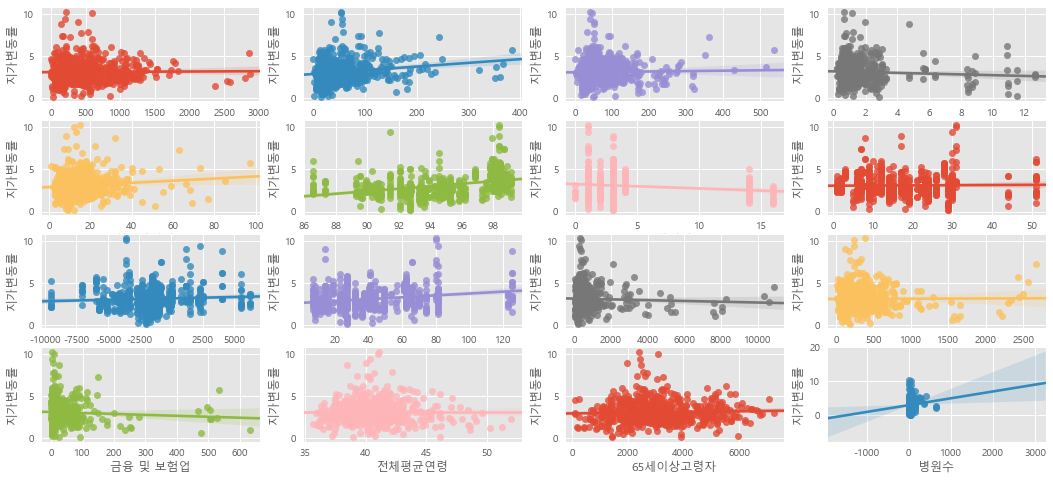

In [8]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(18,8)

sns.regplot(data=train,x="기초수급자",y="지가변동률",ax=ax1)
sns.regplot(data=train,x="건설업 사업체수",y="지가변동률",ax=ax2)
sns.regplot(data=train,x="교육 서비스업",y="지가변동률",ax=ax3)
sns.regplot(data=train,x="면적",y="지가변동률",ax=ax4)
sns.regplot(data=train,x="화재발생건수",y="지가변동률",ax=ax5)
sns.regplot(data=train,x="아파트_매매가격지수",y="지가변동률",ax=ax6)
sns.regplot(data=train,x="문화시설수",y="지가변동률",ax=ax7)
sns.regplot(data=train,x="소공원(수)",y="지가변동률",ax=ax8)
sns.regplot(data=train,x="순수이동건수",y="지가변동률",ax=ax9)
sns.regplot(data=train,x="녹지수",y="지가변동률",ax=ax10)
sns.regplot(data=train,x="도매 및 소매 사업체수",y="지가변동률",ax=ax11)
sns.regplot(data=train,x="숙박및 음식점업",y="지가변동률",ax=ax12)
sns.regplot(data=train,x="금융 및 보험업",y="지가변동률",ax=ax13)
sns.regplot(data=train,x="전체평균연령",y="지가변동률",ax=ax14)
sns.regplot(data=train,x="65세이상고령자",y="지가변동률",ax=ax15)
sns.regplot(data=train,x="병원수",y="지가변동률",ax=ax16)

# 4. Feature engineering


## 4.1 상관관계 분석
* 변수간 상관관계 확인
* 상관관계가 ∣x∣>0.7 이면 같은 정보를 담고있는 변수라고 판단하여 변수를 통합


In [9]:
corr_train=train.corr()

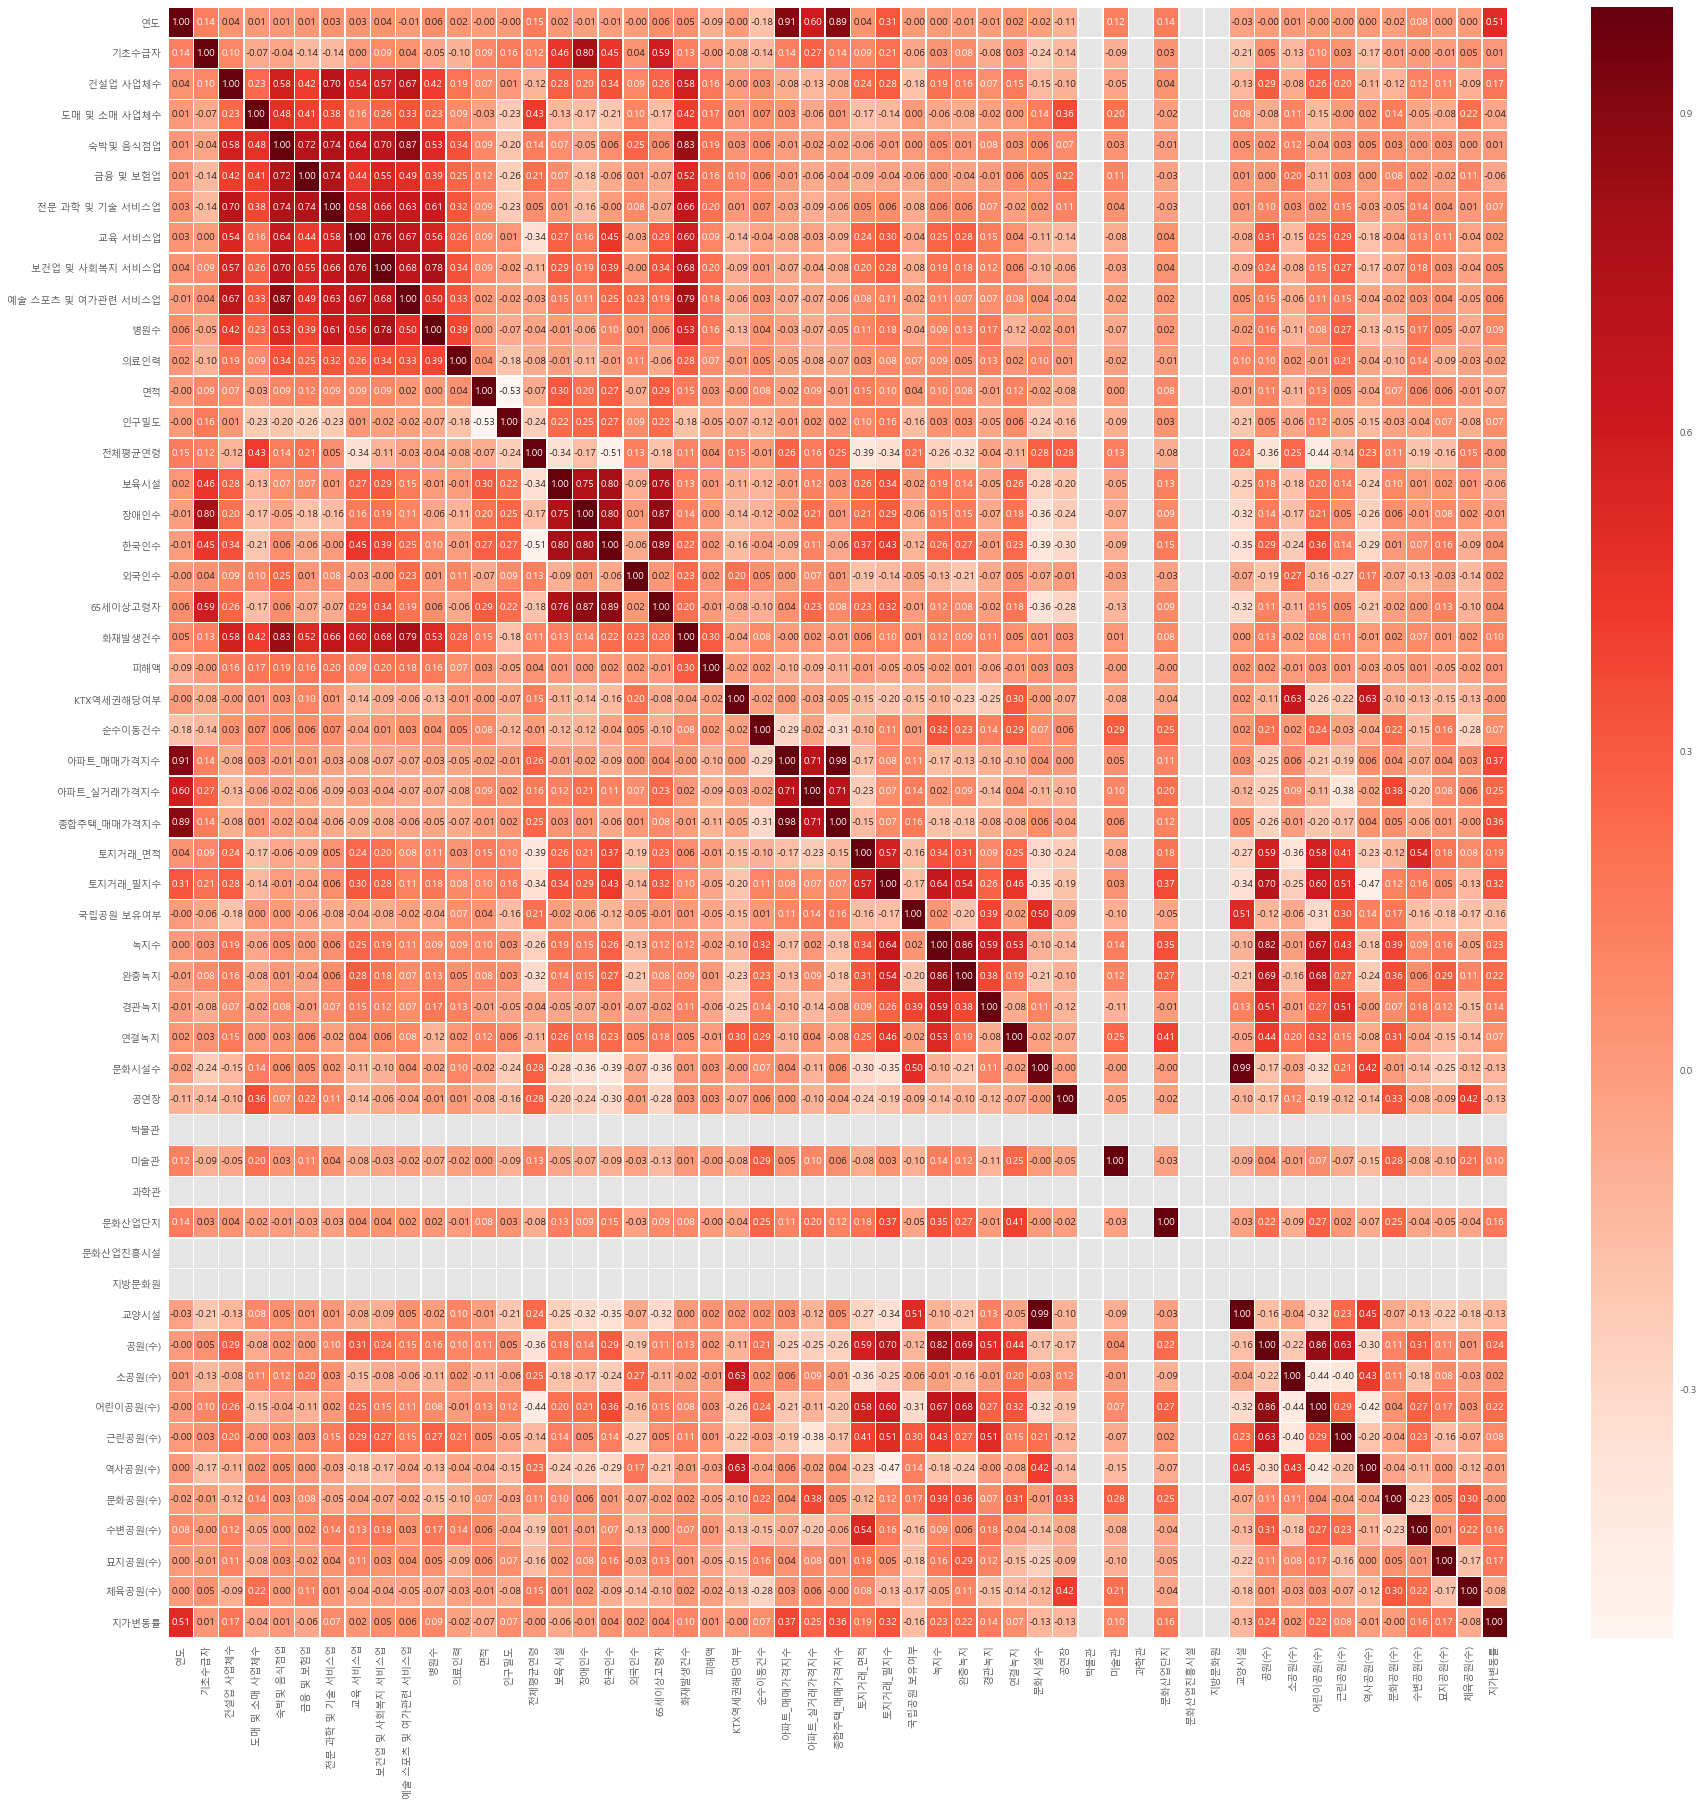

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(data = corr_train, annot=True,
           fmt = '.2f', linewidths=.5, cmap='Reds')

In [11]:
# 상관관계 ∣x∣<0.7 범위의 변수 확인
corr_triu = corr_train.where(~np.tril(np.ones(corr_train.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corr_triu=corr_triu[-0.7<corr_triu]
corr_triu=corr_triu[0.7>corr_triu]
corr_triu

연도        기초수급자                 1.358571e-01
          건설업 사업체수              3.531400e-02
          도매 및 소매 사업체수          6.555490e-03
          숙박및 음식점업              1.402209e-02
          금융 및 보험업              1.454087e-02
          전문 과학 및 기술 서비스업       3.487730e-02
          교육 서비스업               2.599588e-02
          보건업 및 사회복지 서비스업       3.780125e-02
          예술 스포츠 및 여가관련 서비스업   -5.869033e-03
          병원수                   5.574999e-02
          의료인력                  1.732540e-02
          면적                   -1.355002e-03
          인구밀도                 -3.366764e-04
          전체평균연령                1.457060e-01
          보육시설                  1.802822e-02
          장애인수                 -1.290319e-02
          한국인수                 -7.846290e-03
          외국인수                 -2.941361e-03
          65세이상고령자              6.489611e-02
          화재발생건수                4.910672e-02
          피해액                  -9.005390e-02
          KTX역세권해당여부           -5.418864e-18
          

In [12]:
# 높은 상관관계 변수
high_correlation=['아파트_실거래가격지수','종합주택_매매가격지수','공원(수)','교양시설','완충녹지','예술 스포츠 및 여가관련 서비스업']

In [13]:
# 상관관계 ∣x∣<0.7 범위의 변수 삭제,통합
dataset=[train,test]
for  data in dataset:
    data.drop(high_correlation,axis=1,inplace=True)

## 4.2 Data Scaling
* 변수간 단위가 상이하므로 의도치 않은 가중치 모델에 영향을 끼치는 것을 방지
* Normaliztion: x'=(x-max)/(max-min)


### 4.2.1 Numerical Data Normalizing

In [14]:
numeric_col=['기초수급자', '건설업 사업체수', '도매 및 소매 사업체수', '숙박및 음식점업',
       '금융 및 보험업', '전문 과학 및 기술 서비스업', '교육 서비스업', '보건업 및 사회복지 서비스업', '병원수',
       '의료인력', '면적', '인구밀도', '전체평균연령', '보육시설', '장애인수', '한국인수', '외국인수',
       '65세이상고령자', '화재발생건수', '피해액', '순수이동건수', '아파트_매매가격지수',
       '토지거래_면적', '토지거래_필지수', '녹지수', '경관녹지', '연결녹지', '문화시설수',
       '공연장', '박물관', '미술관', '과학관', '문화산업단지', '문화산업진흥시설', '지방문화원', '소공원(수)',
       '어린이공원(수)', '근린공원(수)', '역사공원(수)', '문화공원(수)', '수변공원(수)', '묘지공원(수)',
       '체육공원(수)']

In [15]:
# sklearn 라이브러리를 사용하여 정규화
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
train[numeric_col]=scaler.fit_transform(train[numeric_col])
test[numeric_col]=scaler.fit_transform(test[numeric_col])

In [17]:
train.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,지방문화원,소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수),지가변동률
0,2015.0,서울특별시,종로구,사직동,0.031043,0.109661,0.049080,0.309344,0.175911,0.116822,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.194
1,2015.0,서울특별시,종로구,삼청동,0.015696,0.020888,0.016545,0.076865,0.007924,0.010784,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,2.256
2,2015.0,서울특별시,종로구,부암동,0.035577,0.039164,0.003697,0.041824,0.004754,0.007189,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.190
3,2015.0,서울특별시,종로구,평창동,0.044297,0.065274,0.007857,0.051243,0.009509,0.003954,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.958
4,2015.0,서울특별시,종로구,무악동,0.041507,0.015666,0.000000,0.015825,0.004754,0.001078,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,0.919


In [18]:
test.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,문화산업진흥시설,지방문화원,소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수)
0,2018.0,서울특별시,종로구,사직동,0.038082,0.094987,0.051098,0.316441,0.231986,0.113766,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
1,2018.0,서울특별시,종로구,삼청동,0.020099,0.013193,0.023200,0.085210,0.010545,0.017065,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
2,2018.0,서울특별시,종로구,부암동,0.046544,0.065963,0.005560,0.043919,0.008787,0.009101,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
3,2018.0,서울특별시,종로구,평창동,0.048307,0.052770,0.008916,0.052928,0.014060,0.011377,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
4,2018.0,서울특별시,종로구,무악동,0.044076,0.018470,0.000000,0.005631,0.005272,0.000379,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0


### 4.2.2 Scaling Categorical Data
* 연도: 미래의 연도 데이터를 예측하는 것, 즉 train data set 에는 없는 연도의 데이터를 예측하므로 입력 변수로서 채택X
* 시: 현재 서울특별시에 한정되어 있으므로 변하지 않는 값. 입력변수 채택X
* 구: 구별 지가변동률에 따라 0~1=0, 1~2=0.4,2~3=0.8.,3~=1.2 로 scaliing
* 동: 동별 지가변동률에 따라 0~1=0, 1~2=0.4,2~3=0.8.,3~=1.2 로 scaliing
* KTX역세권여부: 0,1
* 국립공원보유여부: 0,1

### Scaling_"구"

In [19]:
Gu_land_rate={}
for i in train['구']:
    value=np.average(train.loc[train['구']==i,'지가변동률'])
    Gu_land_rate[i]=value

In [20]:
Gu_land_rate

{'강남구': 3.8106410256410252,
 '강동구': 3.2449629629629624,
 '강북구': 2.1179333333333332,
 '강서구': 3.7995833333333331,
 '관악구': 3.2461333333333333,
 '광진구': 3.2572857142857146,
 '구로구': 2.9078333333333339,
 '금천구': 2.9538888888888888,
 '노원구': 2.8534999999999999,
 '도봉구': 2.6514166666666665,
 '동대문구': 2.8609166666666668,
 '동작구': 3.1349444444444448,
 '마포구': 4.2004358974358977,
 '서대문구': 2.8980833333333336,
 '서초구': 3.5989166666666663,
 '성동구': 3.1842128205128204,
 '성북구': 2.5388666666666673,
 '송파구': 3.4359743589743585,
 '양천구': 3.147444444444444,
 '영등포구': 3.0620370370370376,
 '용산구': 3.133833333333333,
 '은평구': 2.5903939393939392,
 '종로구': 2.4540309523809523,
 '중구': 2.5844533333333337,
 '중랑구': 2.927944444444444}

In [21]:
Gu_scaling={}
for Gu in Gu_land_rate:
    if(Gu_land_rate[Gu]<1):
        Gu_scaling[Gu]=0
    if(Gu_land_rate[Gu]>=1 and Gu_land_rate[Gu]<2):
        Gu_scaling[Gu]=0.4
    if(Gu_land_rate[Gu]>=2 and Gu_land_rate[Gu]<3):
        Gu_scaling[Gu]=0.8
    if(Gu_land_rate[Gu]>=3):
        Gu_scaling[Gu]=1.2

In [22]:
Gu_scaling

{'강남구': 1.2,
 '강동구': 1.2,
 '강북구': 0.8,
 '강서구': 1.2,
 '관악구': 1.2,
 '광진구': 1.2,
 '구로구': 0.8,
 '금천구': 0.8,
 '노원구': 0.8,
 '도봉구': 0.8,
 '동대문구': 0.8,
 '동작구': 1.2,
 '마포구': 1.2,
 '서대문구': 0.8,
 '서초구': 1.2,
 '성동구': 1.2,
 '성북구': 0.8,
 '송파구': 1.2,
 '양천구': 1.2,
 '영등포구': 1.2,
 '용산구': 1.2,
 '은평구': 0.8,
 '종로구': 0.8,
 '중구': 0.8,
 '중랑구': 0.8}

In [23]:
train["구"]=train["구"].map(Gu_scaling)
test["구"]=test["구"].map(Gu_scaling)

### Scaling_"동"

In [24]:
Dong_land_rate={}
for i in train['동']:
    value=np.average(train.loc[train['동']==i,'지가변동률'])
    Dong_land_rate[i]=value

In [25]:
Dong_land_rate

{'가락동': 3.5376666666666665,
 '가락본동': 3.5376666666666665,
 '가리봉동': 2.8209999999999997,
 '가산동': 2.9793333333333329,
 '가양동': 4.636333333333333,
 '가회동': 2.8696666666666668,
 '갈현동': 2.75,
 '강일동': 2.129,
 '개봉동': 3.1063333333333336,
 '개포동': 3.8906666666666667,
 '거여동': 3.0013333333333332,
 '고덕동': 4.5469999999999997,
 '고척동': 3.1063333333333336,
 '공덕동': 4.0953333333333335,
 '공릉동': 3.5649999999999999,
 '공항동': 4.8946666666666667,
 '광장동': 2.4073333333333333,
 '광희동': 2.4076666666666666,
 '교남동': 2.1623333333333332,
 '구로동': 2.8209999999999997,
 '구산동': 2.4526666666666661,
 '구의동': 3.7829999999999999,
 '군자동': 3.0203333333333333,
 '금호1가동': 2.9266666666666663,
 '금호2.3가동': 2.9266666666666663,
 '금호4가동': 2.9266666666666663,
 '길동': 2.7013333333333329,
 '길음동': 2.3803333333333332,
 '남가좌동': 2.8930000000000002,
 '남영동': 2.4943333333333335,
 '남현동': 2.7083333333333335,
 '내곡동': 2.6773333333333333,
 '노량진동': 3.1646666666666667,
 '녹번동': 2.4546666666666668,
 '논현동': 4.9136666666666668,
 '능동': 3.2560000000000002,
 '답십리동': 2

In [26]:
Dong_scaling={}
for Dong in Dong_land_rate:
    if(Dong_land_rate[Dong]<1):
        Dong_scaling[Dong]=0
    if(Dong_land_rate[Dong]>=1 and Dong_land_rate[Dong]<2):
        Dong_scaling[Dong]=0.4
    if(Dong_land_rate[Dong]>=2 and Dong_land_rate[Dong]<3):
        Dong_scaling[Dong]=0.8
    if(Dong_land_rate[Dong]>=3):
        Dong_scaling[Dong]=1.2

In [27]:
Dong_scaling

{'가락동': 1.2,
 '가락본동': 1.2,
 '가리봉동': 0.8,
 '가산동': 0.8,
 '가양동': 1.2,
 '가회동': 0.8,
 '갈현동': 0.8,
 '강일동': 0.8,
 '개봉동': 1.2,
 '개포동': 1.2,
 '거여동': 1.2,
 '고덕동': 1.2,
 '고척동': 1.2,
 '공덕동': 1.2,
 '공릉동': 1.2,
 '공항동': 1.2,
 '광장동': 0.8,
 '광희동': 0.8,
 '교남동': 0.8,
 '구로동': 0.8,
 '구산동': 0.8,
 '구의동': 1.2,
 '군자동': 1.2,
 '금호1가동': 0.8,
 '금호2.3가동': 0.8,
 '금호4가동': 0.8,
 '길동': 0.8,
 '길음동': 0.8,
 '남가좌동': 0.8,
 '남영동': 0.8,
 '남현동': 0.8,
 '내곡동': 0.8,
 '노량진동': 1.2,
 '녹번동': 0.8,
 '논현동': 1.2,
 '능동': 1.2,
 '답십리동': 0.8,
 '당산동': 0.8,
 '대림동': 1.2,
 '대방동': 0.8,
 '대조동': 0.8,
 '대치동': 1.2,
 '대흥동': 1.2,
 '도곡동': 0.8,
 '도림동': 0.8,
 '도봉동': 0.8,
 '도화동': 0.8,
 '독산동': 0.8,
 '돈암동': 1.2,
 '동선동': 0.8,
 '둔촌동': 1.2,
 '등촌동': 0.8,
 '마장동': 0.8,
 '마천동': 1.2,
 '망우본동': 0.8,
 '망원동': 1.2,
 '면목본동': 1.2,
 '명동': 0.8,
 '명일동': 0.8,
 '목동': 0.8,
 '무악동': 0.4,
 '묵동': 0.8,
 '문래동': 0.8,
 '문정동': 1.2,
 '미아동': 1.2,
 '반포동': 1.2,
 '반포본동': 1.2,
 '발산동': 0.8,
 '방배동': 1.2,
 '방배본동': 1.2,
 '방이동': 1.2,
 '방학동': 0.8,
 '방화동': 1.2,
 '번동': 0.4,
 '보광동': 1.2,
 '보문동': 0.8,
 

In [28]:
train["동"]=train["동"].map(Dong_scaling)
test["동"]=test["동"].map(Dong_scaling)

In [29]:
train.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,지방문화원,소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수),지가변동률
0,2015.0,서울특별시,0.8,0.4,0.031043,0.109661,0.049080,0.309344,0.175911,0.116822,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.194
1,2015.0,서울특별시,0.8,0.8,0.015696,0.020888,0.016545,0.076865,0.007924,0.010784,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,2.256
2,2015.0,서울특별시,0.8,0.8,0.035577,0.039164,0.003697,0.041824,0.004754,0.007189,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.190
3,2015.0,서울특별시,0.8,1.2,0.044297,0.065274,0.007857,0.051243,0.009509,0.003954,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,1.958
4,2015.0,서울특별시,0.8,0.4,0.041507,0.015666,0.000000,0.015825,0.004754,0.001078,...,0.0,0.36,0.010309,0.538462,0.666667,0.428571,0.0,0.0,0.0,0.919


In [30]:
test.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,문화산업진흥시설,지방문화원,소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수)
0,2018.0,서울특별시,0.8,0.4,0.038082,0.094987,0.051098,0.316441,0.231986,0.113766,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
1,2018.0,서울특별시,0.8,0.8,0.020099,0.013193,0.023200,0.085210,0.010545,0.017065,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
2,2018.0,서울특별시,0.8,0.8,0.046544,0.065963,0.005560,0.043919,0.008787,0.009101,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
3,2018.0,서울특별시,0.8,1.2,0.048307,0.052770,0.008916,0.052928,0.014060,0.011377,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0
4,2018.0,서울특별시,0.8,0.4,0.044076,0.018470,0.000000,0.005631,0.005272,0.000379,...,0.0,0.0,0.244444,0.11828,0.275862,0.666667,0.5,0.0,0.0,0.0


### 의미없는 변수 삭제(연도, 시)

In [31]:
dataset=[train,test]
for  data in dataset:
    data.drop(['연도','시'],axis=1,inplace=True)

## 4.3 PCA를 이용한 차원 축소
* 분산을 확인하여 축소할 차원 수 선택

In [32]:
train_X=train.drop(['지가변동률'],axis=1)
train_Y=train['지가변동률']

In [33]:
# 분산 확인
cov_mat = np.cov(train_X.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cumulative_var_exp = np.cumsum(var_exp)
cumulative_var_exp

array([ 0.16849472,  0.28997949,  0.38919024,  0.4687833 ,  0.54499769,
        0.61418914,  0.66391741,  0.70679501,  0.74429094,  0.7755361 ,
        0.80110374,  0.82459934,  0.84672752,  0.86468535,  0.87960049,
        0.89324383,  0.90652741,  0.91776176,  0.9269085 ,  0.93487829,
        0.94178805,  0.94851497,  0.9541633 ,  0.95944563,  0.9644507 ,
        0.96891866,  0.97271899,  0.97611645,  0.97943089,  0.98227912,
        0.98484109,  0.98730253,  0.98950764,  0.99144389,  0.99316929,
        0.99459811,  0.99578106,  0.9967118 ,  0.9975654 ,  0.99837438,
        0.99906849,  0.99960584,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ])

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(train_X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])

In [36]:
train_pca=principalDf
train_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,-0.871491,1.150145,-0.205743,0.060370,-0.075202,0.177072,0.180700,0.240597,0.234527,0.241641
1,-0.986571,1.139284,-0.260727,-0.031790,-0.360836,0.116698,-0.097974,-0.068489,0.181862,0.333426
2,-0.862440,1.102108,-0.261615,0.040885,-0.195305,0.116465,-0.034051,-0.097770,0.256519,0.338641
3,-0.694378,1.055253,-0.308173,0.066781,-0.086070,0.116414,0.124419,-0.107173,0.312328,0.467378
4,-0.893663,1.110574,-0.201342,0.101475,-0.101315,0.125551,-0.136052,-0.141693,0.272955,0.225684


In [37]:
from sklearn.linear_model import SGDRegressor

In [38]:
clf =SGDRegressor()
clf.fit(train_pca,train_Y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [40]:
score = cross_val_score(clf,train_pca,train_Y,cv=k_fold,n_jobs=1, scoring='r2')
print(np.average(score))

0.212716218416


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administr

###### PCA실행 결과 R_Square 값이 현저히 낮음 -> 다시 normalization만 거친 데이터를 사용

# 5. Modeling
###### : 연속적인 데이터인 "지가변동률"을 예측하므로 regression model을 선택
* Stochastic Gradient Descent
* Support Vector Machine
* Random Forest
* Deep Learning (Multilayer Perceptrons)

In [41]:
train_X=train.drop(['지가변동률'],axis=1)
train_Y=train['지가변동률']

In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#### 5.1 Stochastic Gradient Descent

In [43]:
clf_SGD =SGDRegressor()
clf_SGD.fit(train_X,train_Y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

#### 5.2 Support Vector Machine

In [44]:
clf_SVR =SVR(kernel='rbf',coef0=100,degree=0,epsilon=0)
clf_SVR.fit(train_X,train_Y)

SVR(C=1.0, cache_size=200, coef0=100, degree=0, epsilon=0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### 5.3 Random Forest

In [45]:
clf_RF =RandomForestRegressor(n_estimators=50,n_jobs=5)
clf_RF.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=5,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### 5.4 Deep Learning (Multilayer Perceptrons)

In [46]:
clf_MP =MLPRegressor(alpha=0.0001)
clf_MP.fit(train_X,train_Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# 6. Testing
##### : 'k fold cross validation'을 통해 model performance 확인/ 가장 성능이 우수한 모델을 선택
* Stochastic Gradient Descent
* Support Vector Machine
* Random Forest

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

#### 6.1 Stochastic Gradient Descent

In [48]:
score = cross_val_score(clf_SGD,train_X,train_Y,cv=k_fold,n_jobs=1, scoring='r2')
print(np.average(score))

0.323694958614


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Administr

#### 6.2 Support Vector Machine

In [49]:
score = cross_val_score(clf_SVR,train_X,train_Y,cv=k_fold,n_jobs=1, scoring='r2')
print(np.average(score))

0.397370638095


#### 6.3 Random Forest

In [50]:
score = cross_val_score(clf_RF,train_X,train_Y,cv=k_fold,n_jobs=1, scoring='r2')
print(np.average(score))

0.60475343626


#### 6.4 Deep Learning (Multilayer Perceptrons)

In [51]:
clf_MP =MLPRegressor(beta_1=0.7,beta_2=0.7,learning_rate='constant',solver='adam',tol=0.0000001)
clf_MP.fit(train_X,train_Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.7,
       beta_2=0.7, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [52]:
score = cross_val_score(clf_MP,train_X,train_Y,cv=k_fold,n_jobs=1, scoring='r2')
print(np.average(score))

0.47663720576


## => Random Forest를 기반으로한 clf_RF모델의 성능이 가장 우수하여 최종 모델로 선정!

In [53]:
future_data = pd.read_csv("C:\edb_test.csv",header=0)

In [54]:
# fitting
test_Y=clf_RF.predict(test)
future_data['예측지가변동률']=test_Y

In [55]:
future_data.head()

,연도,시,구,동,기초수급자,건설업 사업체수,도매 및 소매 사업체수,숙박및 음식점업,금융 및 보험업,전문 과학 및 기술 서비스업,...,공원(수),소공원(수),어린이공원(수),근린공원(수),역사공원(수),문화공원(수),수변공원(수),묘지공원(수),체육공원(수),예측지가변동률
0,2018.0,서울특별시,종로구,사직동,109.0,37.0,579.0,856.0,132.0,302.0,...,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0,1.458912
1,2018.0,서울특별시,종로구,삼청동,58.0,6.0,288.0,240.0,6.0,47.0,...,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0,1.516930
2,2018.0,서울특별시,종로구,부암동,133.0,26.0,104.0,130.0,5.0,26.0,...,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0,1.832148
3,2018.0,서울특별시,종로구,평창동,138.0,21.0,139.0,154.0,8.0,32.0,...,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0,2.256780
4,2018.0,서울특별시,종로구,무악동,126.0,8.0,46.0,28.0,3.0,3.0,...,63.0,13.0,27.0,18.0,2.0,3.0,0.0,0.0,0.0,1.835240


In [56]:
future_data.to_csv("2018지가변동률예측.csv",index=False)